# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


**Is the distribution of body temperatures normal? **

In [5]:
import numpy as np

In [11]:
mu = df['temperature'].mean()

In [12]:
sd1 = df['temperature'].std()

In [10]:
import matplotlib.pyplot as plt

In [13]:
std1 = np.random.normal(mu,sd1,100)
std1

array([  97.41929168,   98.2655402 ,   98.29728315,   97.76437255,
         97.02298479,   98.91172353,   98.4128533 ,   97.8600074 ,
         98.96956375,   97.61186165,   98.47218473,   97.61864528,
         97.91761406,   98.11526119,   97.65703512,   98.54420379,
         99.13337124,   97.71512433,   98.18806454,   98.90695966,
         97.01760715,   98.21860836,   97.90662265,   97.8442897 ,
         98.85276402,   98.95053398,   98.83176112,   97.3853341 ,
         98.70695751,   98.74958088,   99.33880425,   97.78010451,
         99.32165456,   98.40659066,   99.85062679,   98.42058427,
         98.71575678,   99.44646528,   97.39902682,   98.27023467,
         98.81560881,   99.1755015 ,   96.98472062,   99.27934583,
         99.19953898,   98.34902096,   97.59252016,   98.95718015,
         99.2323104 ,   97.5793979 ,   97.97556601,   97.92629866,
         99.53996469,   97.61475393,   97.27162021,   98.93470865,
         98.24464038,   99.08541976,   98.67438558,   97.61832

In [15]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x, y

In [16]:
x_data, y_data = ecdf(df['temperature'])
x_data, y_data

(array([  96.3,   96.4,   96.7,   96.7,   96.8,   96.9,   97. ,   97.1,
          97.1,   97.1,   97.2,   97.2,   97.2,   97.3,   97.4,   97.4,
          97.4,   97.4,   97.4,   97.5,   97.5,   97.6,   97.6,   97.6,
          97.6,   97.7,   97.7,   97.7,   97.8,   97.8,   97.8,   97.8,
          97.8,   97.8,   97.8,   97.9,   97.9,   97.9,   97.9,   97.9,
          98. ,   98. ,   98. ,   98. ,   98. ,   98. ,   98. ,   98. ,
          98. ,   98. ,   98. ,   98.1,   98.1,   98.1,   98.2,   98.2,
          98.2,   98.2,   98.2,   98.2,   98.2,   98.2,   98.2,   98.2,
          98.3,   98.3,   98.3,   98.3,   98.3,   98.4,   98.4,   98.4,
          98.4,   98.4,   98.4,   98.4,   98.4,   98.4,   98.5,   98.5,
          98.5,   98.6,   98.6,   98.6,   98.6,   98.6,   98.6,   98.6,
          98.6,   98.6,   98.6,   98.7,   98.7,   98.7,   98.7,   98.7,
          98.7,   98.7,   98.7,   98.8,   98.8,   98.8,   98.8,   98.8,
          98.8,   98.8,   98.8,   98.8,   98.8,   98.9,   98.9, 

In [17]:
x, y = ecdf(std1)
x, y

(array([  96.70290174,   96.71115703,   96.9712215 ,   96.98472062,
          97.01760715,   97.02298479,   97.18973411,   97.20890157,
          97.2118532 ,   97.27162021,   97.36692116,   97.3853341 ,
          97.39902682,   97.41929168,   97.44190707,   97.55020479,
          97.5779603 ,   97.5793979 ,   97.59252016,   97.61186165,
          97.61475393,   97.61832504,   97.61864528,   97.65703512,
          97.71512433,   97.76437255,   97.77153265,   97.78010451,
          97.8442897 ,   97.85286675,   97.8600074 ,   97.90662265,
          97.91761406,   97.92629866,   97.94491636,   97.97556601,
          97.99516565,   98.00830847,   98.01512163,   98.11526119,
          98.18806454,   98.21860836,   98.24464038,   98.2655402 ,
          98.26782787,   98.27023467,   98.29728315,   98.31165695,
          98.3123817 ,   98.34902096,   98.38180127,   98.40130117,
          98.40659066,   98.4128533 ,   98.41612298,   98.42058427,
          98.47218473,   98.54420379,   98.60394

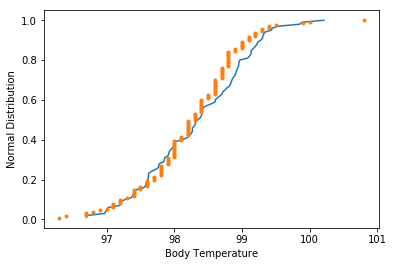

In [18]:
plt.plot(x,y)
plt.plot(x_data,y_data,marker='.',linestyle='none')
plt.xlabel('Body Temperature')
plt.ylabel('Normal Distribution')
plt.show()

** Is the sample size large? Are the observations independent? **

Ans: Yes

** Is the true population mean really 98.6 degrees F? **
* Would you use a one-sample or two-sample test? Why? 
* In this situation, is it appropriate to use the t or z  statistic? 
* Now try using the other test. How is the result be different? Why? 


In [19]:
true_mean = np.mean(df['temperature'])
true_mean

98.24923076923078

As we can from the above result that the true population mean is not really 98.6 degrees F

** Would you use a one-sample or two-sample test? Why? ** 

We will use one-sample test because we are not comparing temperature on any subject matter. One-Sample test works here because temperature is independent

** In this situation, is it appropriate to use the t or z statistic? ** 

We can use Z statistic because the given sample is more than 30


** Now try using the other test. How is the result be different? Why? **

Will come back on this later